# Assignment 04
EE 538 Spring 2020 <br>
Analog Circuits for Sensor Systems <br>
University of Washington Electrical & Computer Engineering <br>

Due: May 2, 2020 <br>
Author: Kevin Egedy

In [1]:
# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import ltspice
import sympy as sp
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def read_ltspice_tran(file_name):
    cols = []
    arrs = []
    with open(file_name, 'r',encoding='utf-8') as data:
        for i,line in enumerate(data):
            if i==0:
                cols = line.split()
                arrs = [[] for _ in cols]
                continue
            parts = line.split()
            for j,part in enumerate(parts):
                arrs[j].append(part)
    df = pd.DataFrame(arrs,dtype='float64')
    df = df.T
    df.columns = cols
    return df

<img src="images/HW04Q1.png" width="600">

*Reference: https://inst.eecs.berkeley.edu/~ee105/fa14/lectures/Lecture04-Non-ideal%20Op%20Amps%20(Feedback%20circuit).pdf*

**Feedback** <br>
*Opamp inputs are only exactly equal if the open loop gain is infinite* 
<img src="images/feedback.png" width="200">

$\begin{eqnarray}
& V_{\text{out}} &=& A_v v_{\text{in}} \Bigg|_{v_{\text{in}} = v^{+}-v^{-}} \\[0.5em]
& A_{CL} &=& \frac{V_o}{V_i} = \frac{A_{OL}}{1+\beta A_{OL}} \\[0.5em]
\end{eqnarray}$

<hr>

**Output Resistance**<br>
*Same for Inverting and Non-inverting* 
<img src="images/output_resistance.png" width="800">

<hr>

**Input Resistance: Inverting**<br>
<img src="images/input_resistance_inverting.png" width="800">


<hr>

**Input Resistance: Non-inverting**<br>
<img src="images/input_resistance_noninverting.png" width="800">

<hr>

**Part A**

**Open-Loop**

$\begin{eqnarray}
&& \frac{V_{\text{out}}}{V_{\text{in}}} &=& A_0 = \infty \\[0.5em]
&& R_{\text{out}} &=& 0\\[0.5em]
&& R_{\text{in}} &=& \infty \\[0.5em]
\end{eqnarray}$

**Close-Loop Inverting** $A\rightarrow \infty$

$\begin{eqnarray}
&& \frac{V_{\text{out}}}{V_{\text{in}}} &=& \frac{A_{OL}}{1+\beta A_{OL}}\Bigg|_{A_{OL}\rightarrow \infty} &=& \frac{1}{\beta} &=& \frac{-R_2}{R_1} \\[0.5em]
&& R_{\text{out}} &=& R_1 + R_2\\[0.5em]
&& R_{\text{in}} &=& R_1 \\[0.5em]
\end{eqnarray}$

**Close-Loop Non-inverting** $A\rightarrow \infty$

$\begin{eqnarray}
&& \frac{V_{\text{out}}}{V_{\text{in}}} &=& \frac{A_{OL}}{1+\beta A_{OL}}\Bigg|_{A_{OL}\rightarrow \infty} &=& \frac{1}{\beta} &=& 1 + \frac{R_2}{R_1} \\[0.5em]
&& R_{\text{out}} &=& R_1 + R_2\\[0.5em]
&& R_{\text{in}} &=& \infty \\[0.5em]
\end{eqnarray}$

$R_{\text{out}}$ and $R_{\text{in}}$ have large differences between open loop and closed loop

<hr>

**Part B**

$R_{\text{out}}$ Calculations

$\begin{eqnarray}
&& i_{\text{test}} &=& i_2 + i_3 \\[0.5em]
&& i_2 &=& \frac{v_{\text{test}}}{R_1+R_2} \\[0.5em]
&& i_3 &=& \frac{v_{\text{test}}-Av_{id}}{R_0} \\[0.5em]
&& v_{id} &=& -v_A = \frac{-R_1}{R_1+R_2}v_{\text{test}} = -\beta v_{\text{test}} \\[0.5em]
&& i_{\text{test}} &=& \frac{v_{\text{test}}}{R_1+R_2} + \frac{v_{\text{test}}+A\beta v_{\text{test}}}{R_0} &=& 
v_{\text{test}}(\frac{1}{R_1+R_2} + \frac{1+A\beta}{R_0})\\
&& Z_1 \parallel Z_2 &=& \frac{1}{\frac{1}{Z_1}+\frac{1}{Z_2}} \\[0.5em]
&& R_{\text{out}} = \frac{v_{\text{test}}}{i_{\text{test}}} &=& 
\frac{1}{\frac{1}{R_1+R_2} + \frac{1+A\beta}{R_0}} \\[0.5em]
&& R_{\text{out}} &=& (R_1+R_2) \parallel \frac{R_0}{1+A\beta} 
 \\[0.5em]
&& && (R_1+R_2) \gg \frac{R_0}{1+A\beta} \Bigg|_{A\rightarrow \infty} \\[0.5em]
&& R_{\text{out}} &\approx& \frac{R_0}{1+A\beta} \Bigg|_{A\rightarrow \infty} = 0
\end{eqnarray}$

<hr>

Inverting $R_{\text{in}}$ Calculations

$\begin{eqnarray}
&& R_{\text{in}} &=& \frac{v_{\text{test}}}{i_{\text{test}}} \\[0.5em]
&& &=& \frac{i_{\text{test}}R_1 +v_A}{i_{\text{test}}} \\[0.5em]
&& &=& R_1 + \frac{v_A}{i_{\text{test}}} \\[0.5em]
&& \text{Note: }&& \text{Solve by removing }R_1 \\[0.5em]
&& i_{\text{test}} &=& i_1 + i_2 \\[0.5em]
&& &=& \frac{v_{\text{test}}}{R_i} + \frac{v_{\text{test}}-v_{\text{out}}}{R_2} \\[0.5em]
&& &=& \frac{v_{\text{test}}}{R_i} + \frac{v_{\text{test}}+ Av_{\text{test}}}{R_2} \\[0.5em]
&& \frac{v_{\text{test}}}{i_{\text{test}}} &=& 
\frac{1}{R_i} + \frac{1+A}{R_2}  = R_i \parallel (\frac{R_2}{1+A}) \\[0.5em]
&& R_{\text{in}} &=&  R_1 + R_i \parallel (\frac{R_2}{1+A}) \approx
R_1 \parallel (\frac{R_2}{1+A}) \\[0.5em]
&& R_{\text{in}} &\approx& R_1 \parallel (\frac{R_2}{1+A}) \Bigg|_{A\rightarrow \infty} = R_1
\end{eqnarray}$

<hr>

Non-inverting $R_{\text{in}}$ Calculations

$\begin{eqnarray}
&& v_{id} &=& v_{\text{test}} - v_A \\[0.5em]
&& i_{\text{test}} &=& \frac{v_{\text{test}}-v_A}{R_i} \\[0.5em]
&& \frac{V_{\text{out}}-v_A}{R_2} &=& \frac{v_A}{R_1} \\[0.5em]
&& v_A &=& \frac{R_1}{R_1+R_2}V_{\text{out}} = \beta V_{\text{out}} \\[0.5em]
&& &=& A \beta V_{id} \\[0.5em]
&& &=& A \beta (v_{\text{test}}-v_A) \\[0.5em]
&& v_A + A \beta v_A &=& A \beta v_{\text{test}} \\[0.5em]
&& v_A(1 + A \beta) &=& A \beta v_{\text{test}} \\[0.5em]
&& v_A &=& \frac{A \beta}{1 + A \beta} v_{\text{test}} \\[0.5em]
&& i_{\text{test}} &=& \frac{v_{\text{test}}-v_A}{R_i} \\[0.5em]
&& &=& \frac{v_{\text{test}}-\frac{A \beta}{1 + A \beta} v_{\text{test}}}{R_i} \\[0.5em]
&& &=& \frac{v_{\text{test}}(1-\frac{A \beta}{1 + A \beta} )}{R_i} \\[0.5em]
&& &=& \frac{v_{\text{test}}\frac{1}{1 + A \beta}}{R_i} \\[0.5em]
&& &=& \frac{v_{\text{test}}}{R_i(1 + A \beta)} \\[0.5em]
&& R_{\text{in}} = \frac{v_{\text{test}}}{i_{\text{test}}} &=& R_i(1 + A \beta) \Bigg|_{A\rightarrow \infty} = \infty
\end{eqnarray}$

<hr>

**Inverting Summary** $A_0$ is finite

$\begin{eqnarray}
&& \frac{V_{\text{out}}}{V_{\text{in}}} &=& \frac{-R_2}{R_1}(\frac{A\beta}{1+A\beta}) \Bigg|_{\beta = \frac{R_1}{R_1+R_2}, A\rightarrow \infty} \approx \frac{-R_2}{R_1}\\[0.5em]
&& R_{\text{in}} &=& R_1 + (R_i \parallel \frac{R_2}{1+A}) 
\Bigg|_{A\rightarrow \infty} \approx R_1\\[0.5em]
&& R_{\text{out}} &=& (R_1+R_2) \parallel \frac{R_0}{1+A\beta} \Bigg|_{A\rightarrow \infty} \approx 0\\[0.5em]
\end{eqnarray}$

**Non-inverting Summary** $A_0$ is finite

$\begin{eqnarray}
&& \frac{V_{\text{out}}}{V_{\text{in}}} &=& (1+\frac{R_2}{R_1})(\frac{A\beta}{1+A\beta}) \Bigg|_{\beta = \frac{R_1}{R_1+R_2}, A\rightarrow \infty} \approx 1+\frac{R_2}{R_1}\\[0.5em]
&& R_{\text{in}} &=& R_i(1 + A \beta) \Bigg|_{\beta = \frac{R_1}{R_1+R_2}, A\rightarrow \infty} = \infty \\[0.5em]
&& R_{\text{out}} &=& (R_1+R_2) \parallel \frac{R_0}{1+A\beta} \Bigg|_{A\rightarrow \infty} \approx 0\\[0.5em]
\end{eqnarray}$


<hr>

**Part C**
<img src="images/Q1_inverting_voltage_offset.png" width="400">
<img src="images/Q1_noninverting_voltage_offset.png" width="400">

|          | |             | |   |
|----------|-|-------------|-|---|
| V(vout)  | | -8.8999     | | voltage  |
| V(n001)  | | 15          | | voltage  |
| V(n004)  | | -15         | | voltage  |
| V(vin)   | | 1           | | voltage  |
| V(vos)   | | 0.1         | | voltage  |

$$\frac{V_{\text{in}}-v_{\text{os}}}{R1} = \frac{v_{\text{os}}-V_{\text{out}}}{R_2}$$

Inverting Voltage Offset Calculations:

$V_{\text{out}} = \frac{-R_2}{R_1}V_{\text{in}} + v_{\text{os}}(1+\frac{R_2}{R_1}) \Bigg|_{R_2=10K, R_1=1K, V_{\text{in}}=1V, v_{\text{os}} = 0.1V} = -8.9V$

Non-inverting Voltage Offset Calculations: 

$V_{\text{out}} = \frac{-R_2}{R_1}V_{\text{in}} + v_{\text{os}}(1+\frac{R_2}{R_1}) \Bigg|_{R_2=10K, R_1=1K, V_{\text{in}}=1V, v_{\text{os}} = 0.1V} = -8.9V$

<hr>

**Part D**

Inverting Input Bias Calculations: $V_{\text{out}} = I_B R_2$

Non-inverting Input Bias Calculations: $V_{\text{out}} = I_B R_2$

<img src="images/HW04Q2.png" width="600">

**Part A**

$\begin{eqnarray}
&&\frac{V_{\text{out}}-V^{-}}{R\parallel C}\Bigg|_{V^{-}=0} &=& i_{\text{in}} \\[0.5em]
\end{eqnarray}$

$\begin{eqnarray}
&&\frac{V_{\text{out}}}{i_{\text{in}}} &=& R\parallel C \\[0.5em]
&&\frac{V_{\text{out}}}{i_{\text{in}}} &=& \frac{R}{1+sRC} \\[0.5em]
&&\frac{V_{\text{out}}}{i_{\text{in}}} &=& \frac{R}{1+s\tau}, \tau = RC
\end{eqnarray}$


**Part B**

$\begin{eqnarray}
&& \mathcal{L}\{\frac{V_{\text{out}}}{i_{\text{in}}} \} 
&=& \frac{R}{1+s\tau} \\[0.5em]
&& &=& R\frac{1}{\frac{\tau+s}{\tau}} \\[0.5em]
&& &=& R\frac{\tau}{\tau+s} \\[0.5em]
&& &=& R\tau \cdot \frac{1}{\tau+s} \\[0.5em]
&& \mathcal{L}^{-1} \{\frac{V_{\text{out}}}{i_{\text{in}}} \} &=& R\tau \cdot e^{-\tau t} \\[0.5em]
&& i_{\text{in}} &=& i_{\text{max}}(u(t)-u(t-t_{\text{on}})) \\[0.5em]
&&  \mathcal{L}\{i_{\text{in}} \} &=& i_{\text{max}} \cdot \frac{1}{s} (1-e^{-t_{\text{on}}s})\\[0.5em]
&& V_{\text{out}} &=& \mathcal{L}\{\frac{V_{\text{out}}}{i_{\text{in}}} \} \cdot \mathcal{L}\{i_{\text{in}} \} \\[0.5em]
&& &=& R\tau i_{\text{max}} \cdot \frac{1}{s} (1-e^{-t_{\text{on}}s}) \frac{1}{\tau+s} \\[0.5em]
&& f(t) = \mathcal{L}^{-1}\{ V_{\text{out}} \} &=& R\tau i_{\text{max}} \cdot (u(t)-u(t-t_{\text{on}})) \cdot e^{-\tau t} \\[0.5em]
&& f(t) = \mathcal{L}^{-1}\{ V_{\text{out}} \} \Bigg|_{t=t_{\text{on}},\tau = RC}&=& 
R\tau i_{\text{max}} e^{-\tau t_{\text{on}}} \\[0.5em]
\end{eqnarray}$

**Extra Credit**



<img src="images/HW04Q3.png" width="600">

*Reference: https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-071j-introduction-to-electronics-signals-and-measurement-spring-2006/lecture-notes/23_op_amps2.pdf*

**Part A**

$\begin{eqnarray}
&& V_{\text{out2}} &=& V_{\text{ip}}\frac{R_2}{R_1+R_2}(1+\frac{R_4}{R_3}) \\[0.5em]
&& V_{\text{out1}} &=& -V_{\text{im}}\frac{R_4}{R_3} \\[0.5em]
&& V_{\text{out}} &=& V_{\text{out2}}+ V_{\text{out1}} \\[0.5em]
&& &=& V_{\text{ip}}\frac{R_2}{R_1+R_2}(1+\frac{R_4}{R_3})
-V_{\text{im}}\frac{R_4}{R_3} \\[0.5em]
&& \text{Note:}&& \text{weight of each signal must be the same} \\[0.5em]
&& && \frac{R_2}{R_1+R_2}(1+\frac{R_4}{R_3}) = \frac{R_4}{R_3} \rightarrow \frac{R_2}{R_1} = \frac{R_4}{R_3}\\[0.5em]
&& V_{\text{out}} &=& \frac{R_2}{R_1}(V_{\text{ip}}-V_{\text{im}}) \\[0.5em]
\end{eqnarray}$


Find $\beta$

$\begin{eqnarray}
&& \frac{V_{\text{out}}}{V_{\text{in}}} &=& \frac{A_{OL}}{1+\beta A_{OL}}\Bigg|_{A_{OL}\rightarrow \infty} \\[0.5em]
&& &\approx& \frac{1}{\beta} = \frac{R_2}{R_1}\Bigg|_{R_2=10K, R_1=10K} = 1\\[0.5em]
\end{eqnarray}$

Frequency Response

$\begin{eqnarray}
&& A_{OL}(s) = \frac{A_0}{1+s\tau }  \\[0.5em]
&& f_{3\text{dB},\text{OL}} = \frac{1}{\tau} = \frac{f_T}{A_0} = 
\frac{10\cdot 10^6}{10^5} = 100 \text{Hz}
\end{eqnarray}$

Graphical Approximation: $f_{3\text{dB}} = \frac{f_T}{10^{A_{\text{dB}}/20}}$

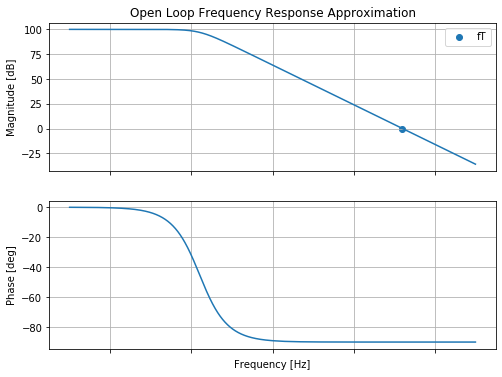

In [3]:
f1 = np.linspace(1e-2,1e3,100000)
f2 = np.linspace(1e3,1e8,100000)
f = np.concatenate((f1,f2))
w = 2*np.pi*f
s = 1j*w
A0 = 1e5
beta = 1
fT = 10e6
tau = A0/fT
H = A0/(1+s*tau)

#Find 3dB
mag = 20*np.log10(abs(H))
x0 = np.where(mag<=(max(mag)-3))[0][0]
label0 = "{:.2f}".format(f[x0])
x1 = np.where(mag<=0)[0][0]
label1 = "{:.2e}".format(f[x1])
#print(f"3dB frequency at {label0}")
#print(f"fT frequency at {label1}")

#Plot
fig, axs = plt.subplots(2,figsize=(8,6))
axs[0].set_title('Open Loop Frequency Response Approximation')
axs[0].semilogx(f, 20*np.log10(abs(H)))
#axs[0].scatter(f[x0], mag[x0],label=f"3dB: {label0}Hz")
axs[0].scatter(f[x1], mag[x1],label="fT")
axs[0].set_ylabel('Magnitude [dB]')
axs[0].set_xticklabels([])
axs[0].grid()
axs[0].legend()
axs[1].semilogx(f, np.angle(H,deg=True))
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_xticklabels([])
axs[1].grid()
#axs[1].legend()
plt.show();

**Part B**

Frequency Response

$\begin{eqnarray}
&& A_{CL}(s) &=& \frac{A_0}{1+s\tau + \beta A_0}  \\[0.5em]
&& f_{3\text{dB},\text{CL}} &=& \frac{\beta A_0}{\tau} = \beta f_T \\[0.5em]
&& &&\beta f_T \Bigg|_{\beta = 1} = 10\cdot 10^6 = 10^7 \text{Hz} 
\end{eqnarray}$

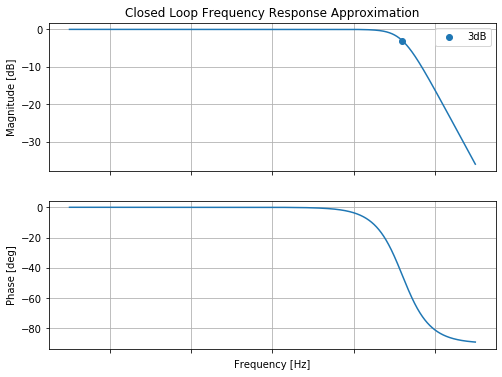

In [4]:
f1 = np.linspace(1e-2,1e3,100000)
f2 = np.linspace(1e3,1e8,100000)
f = np.concatenate((f1,f2))
s = 2j*np.pi*f
A0 = 1e5
beta = 1
fT = 10e6
tau = A0/fT
H = A0/(1+s*tau + beta*A0)

#Find 3dB
mag = 20*np.log10(abs(H))
x0 = np.where(mag<=(max(mag)-3))[0][0]
label = "{:.2e}".format(f[x0])
#print(f"3dB frequency at {label}")

#Plot
fig, axs = plt.subplots(2,figsize=(8,6))
axs[0].set_title('Closed Loop Frequency Response Approximation')
axs[0].semilogx(f, 20*np.log10(abs(H)))
axs[0].scatter(f[x0], mag[x0],label=f"3dB")
axs[0].set_ylabel('Magnitude [dB]')
axs[0].set_xticklabels([])
axs[0].grid()
axs[0].legend()
axs[1].semilogx(f, np.angle(H,deg=True))
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_xticklabels([])
axs[1].grid()
#axs[1].legend()
plt.show();

**Part C**

$\begin{eqnarray}
R_{im} &=& R_3 + (R_i \parallel \frac{R_4}{1+A}) \approx R_3 = 10K\Omega \\[0.5em]
R_{ip} &=& R_1 + (R_2 \parallel \infty) = R_1 + R_2 = 20K\Omega
\end{eqnarray}$

**Part D**

<img src="images/Q3difference_amplifier.png" width="400">

In [5]:
filepath = 'data/Q3.txt'
df = read_ltspice_tran(filepath)
df['H_Mag'] = df['V(vout)/(V(Vip)-V(Vim))'].apply(lambda x: x.split(',')[0])
df['H_Mag'] = df['H_Mag'].apply(lambda x: x[1:-2])
df['H_Mag'] = df['H_Mag'].astype('float64')
df['H_Phase'] = df['V(vout)/(V(Vip)-V(Vim))'].apply(lambda x: x.split(',')[1])
df['H_Phase'] = df['H_Phase'].apply(lambda x: x[0:-2])
df['H_Phase'] = df['H_Phase'].astype('float64')
df['Freq.'] = df['Freq.'].astype('float64')

3dB frequency at 7.08e+06Hz


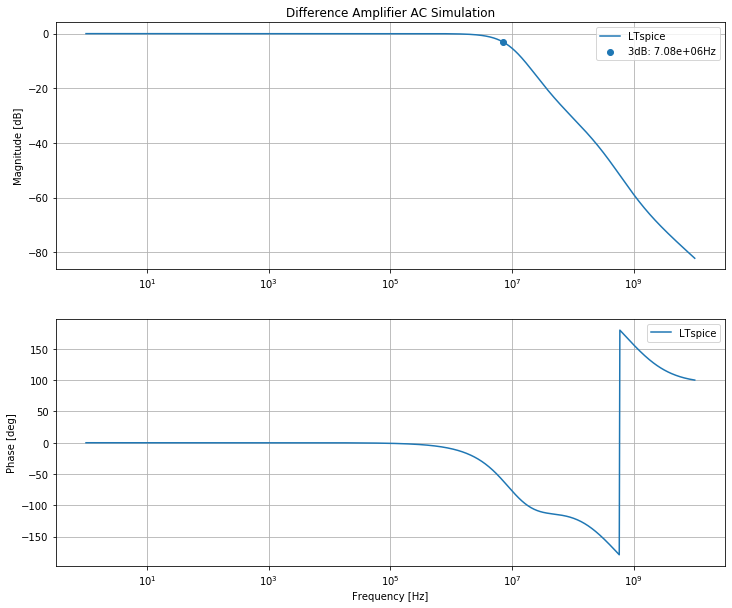

In [6]:
fig, axs = plt.subplots(2,figsize=(12,10))
freq = df['Freq.']
mag = df['H_Mag']
ang = df['H_Phase']

#Find 3dB
x0 = np.where(mag<=(max(mag)-3))[0][0]
label0 = "{:.2e}".format(freq[x0])
print(f"3dB frequency at {label0}Hz")

#Plot
axs[0].set_title('Difference Amplifier AC Simulation')
axs[0].semilogx(freq, mag, label='LTspice')
axs[0].scatter(freq[x0], mag[x0],label=f"3dB: {label0}Hz")
axs[0].set_ylabel('Magnitude [dB]')
axs[0].grid()
axs[0].legend()
axs[1].semilogx(freq, ang, label='LTspice')
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].grid()
axs[1].legend()
plt.show();

In [7]:
filepath = 'data/Q3_inverting.txt'
df = read_ltspice_tran(filepath)
df['Rin'] = df['V(vim)/I(V1)'].apply(lambda x: x.split(',')[0])
df['Rin'] = df['Rin'].astype('float64')
df['Freq.'] = df['Freq.'].astype('float64')
print(f'Rim is {round(max(df["Rin"][0:100]),2)}')

Rim is 10000.0


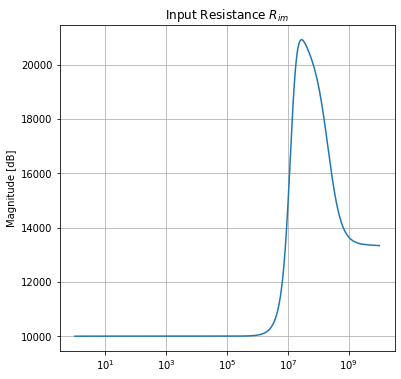

In [8]:
fig, ax = plt.subplots(1,figsize=(6,6))
freq = df['Freq.']
mag = df['Rin']

ax.set_title(r'Input Resistance $R_{im}$')
ax.semilogx(freq, mag, label='LTspice')
ax.set_ylabel('Magnitude [dB]')
ax.grid()
#ax.legend()
plt.show();

In [9]:
filepath = 'data/Q3_noninverting.txt'
df = read_ltspice_tran(filepath)
df['Rin'] = df['V(vip)/I(V2)'].apply(lambda x: x.split(',')[0])
df['Rin'] = df['Rin'].astype('float64')
df['Freq.'] = df['Freq.'].astype('float64')
print(f'Rip is {round(max(df["Rin"][0:100]),2)}')

Rip is 20000.0


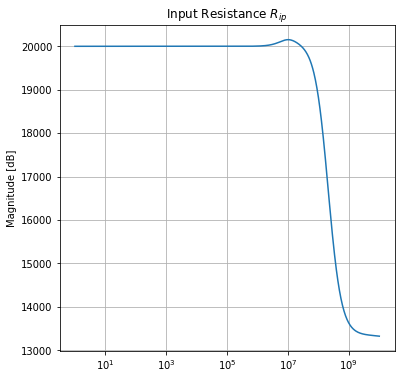

In [10]:
fig, ax = plt.subplots(1,figsize=(6,6))
freq = df['Freq.']
mag = df['Rin']

ax.set_title(r'Input Resistance $R_{ip}$')
ax.semilogx(freq, mag, label='LTspice')
ax.set_ylabel('Magnitude [dB]')
ax.grid()
#ax.legend()
plt.show();